# Bay Wheels's trip Dataset Exploration
## by Chrysanthi Polyzoni

> We will be exploring data teken from [Bay Wheels Bike share service](https://www.lyft.com/bikes/bay-wheels/system-data). Bay Wheels offers affordable, accessible, and fun transportation option for everyone. [Bay Area](https://it.wikipedia.org/wiki/San_Francisco_Bay_Area) residents who qualify for CalFresh, SFMTA Lifeline Pass, or PG&E CARE utility discount are eligible to join Bike Share for All program for 5 USD for the first year — now accepting prepaid cards!

The Data
Each trip is anonymized and includes:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual

This data is provided according to the [Bay Wheels License Agreement](https://baywheels-assets.s3.amazonaws.com/data-license-agreement.html).

<a id='top'></a>
## Preliminary Wrangling

- [Gathering the Data](#aquire)
- [Assessing](#assess)
- [Cleaning](#clean)
- [Exploratory Data Analysis](#analyze)

<a id='aquire'></a>
### Gathering Data for the greater San Fransisco Bay Area:
The Data for one month of a year is saved in a zipped 'csv' File on the [Website of the Company](https://s3.amazonaws.com/baywheels-data/index.html) . As an example, the File '201801-fordgobike-tripdata.csv.zip' contains all the rides that occured in January 2018.
After programmatically downloading and unzipping all available months of the year 2018,
We will load and concatenate all <i>CSV</i> Files in a Dataframe where we will be conducting our analysis on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import os
import zipfile

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

Downloading all necessary Files for the year 2019 programmatically:¶

In [2]:
csv_downloaded = False # Set to True to prevent downloading Process from occuring \
                      #every time we re-run the notebook
filename_ford = '2019xx-fordgobike-tripdata.csv.zip'
filename_wheels = '2019xx-baywheels-tripdata.csv.zip'
base_url = 'https://s3.amazonaws.com/baywheels-data/'

datafolder = './data' # keeping all csv files in a 'data' directory, under the current directory
if not os.path.exists(datafolder):
    os.makedirs(datafolder)
    print('make {}'.format(datafolder))

for i in range(5, 13):
    if csv_downloaded:
        break
    
    iter_wheels = str(filename_wheels).replace("xx", "{:02d}".format(i))
    url = base_url + iter_wheels
    local_file = os.path.join(datafolder, iter_wheels)
    
    # download the zip file locally
    if not os.path.exists(local_file[:-4]):
        print("\n{} does not exist. --> download it".format(local_file))
        try:
            response = requests.get(url)
            with open(local_file, mode='wb') as file:
                file.write(response.content)
                    # unzip file to the previously created 'data' directory
                with zipfile.ZipFile(local_file, 'r') as myzip:
                    myzip.extractall(path = datafolder)
                    print("{} --> unzipping file".format(local_file))
            os.remove(local_file)
            print("{}--> removing initial zip file".format(local_file))
        except OSError as err:
            print("OS error: {0}".format(err))
            
for i in range(1, 5):
    if csv_downloaded:
        break
    iter_ford = str(filename_ford).replace("xx", "{:02d}".format(i))
    url = base_url + iter_ford
    local_file = os.path.join(datafolder, iter_ford)

            
    if not os.path.exists(local_file[:-4]):
        print("\n{} does not exist. --> download it".format(local_file))
        try:
            response = requests.get(url)
            with open(local_file, mode='wb') as file:
                file.write(response.content)
                # unzip file to the previously created 'data' directory
                with zipfile.ZipFile(local_file, 'r') as myzip:
                    myzip.extractall(path = datafolder)
                    print("{} --> unzipping file".format(local_file))
            os.remove(local_file)
            print("{}--> removing initial zip file".format(local_file))
        except OSError as err:
            print("OS error: {0}".format(err))

os.listdir(datafolder)

['201901-fordgobike-tripdata.csv',
 '201902-fordgobike-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 '201904-fordgobike-tripdata.csv',
 '201905-baywheels-tripdata.csv',
 '201906-baywheels-tripdata.csv',
 '201907-baywheels-tripdata.csv',
 '201908-baywheels-tripdata.csv',
 '201909-baywheels-tripdata.csv',
 '201910-baywheels-tripdata.csv',
 '201911-baywheels-tripdata.csv',
 '201912-baywheels-tripdata.csv',
 '__MACOSX']

Read csv Files and create a list of Pandas dataframes:

In [3]:
%%time

df_list = [] # list of dataframes to read the csv files in.
x= 0

for file in os.listdir(datafolder):
    if file.endswith('.csv'):
        
        col_list = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 
                    'start_station_name', 'start_station_latitude', 'start_station_longitude',
                    'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude',
                    'bike_id', 'user_type']
    
        
        types = {'duration_sec': np.int32, 'start_time': 'string', 'end_time': 'string', 'start_station_id': 'string',
                 'start_station_name': 'string', 'start_station_latitude' : np.float64, 'start_station_longitude': np.float64,
                 'end_station_id': 'string', 'end_station_name':'string', 'end_station_latitude':np.float64,
                 'end_station_longitude':np.float64, 'bike_id':'string', 'user_type':'category'}
        
        df_temp = pd.read_csv('./data/' + file, dtype = types, na_values = np.nan, low_memory=False)
        
        print('\nSaving {} into Pandas Data Frame with original dimensions {}'.format(file, df_temp.shape))
        df_features = list(df_temp.columns)
        #print(df_features)
        for col in df_temp.columns:
            if col not in col_list:
                df_temp.drop(col, axis=1, inplace = True)
        print('Updated shape after dropping non consistent features in all DataFrames is {}'.format(df_temp.shape))
        df_list.append(df_temp)
        x += df_temp.shape[0]

print('\nNumber of dfs read: ', len(df_list))
print('Number of rows read: ', x)


Saving 201901-fordgobike-tripdata.csv into Pandas Data Frame with original dimensions (192082, 14)
Updated shape after dropping non consistent features in all DataFrames is (192082, 13)

Saving 201902-fordgobike-tripdata.csv into Pandas Data Frame with original dimensions (183412, 14)
Updated shape after dropping non consistent features in all DataFrames is (183412, 13)

Saving 201903-fordgobike-tripdata.csv into Pandas Data Frame with original dimensions (256299, 14)
Updated shape after dropping non consistent features in all DataFrames is (256299, 13)

Saving 201904-fordgobike-tripdata.csv into Pandas Data Frame with original dimensions (239111, 14)
Updated shape after dropping non consistent features in all DataFrames is (239111, 13)

Saving 201905-baywheels-tripdata.csv into Pandas Data Frame with original dimensions (182163, 14)
Updated shape after dropping non consistent features in all DataFrames is (182163, 13)

Saving 201906-baywheels-tripdata.csv into Pandas Data Frame with 

Concatenate the dataframes contained in the list in a single Dataframe:

In [4]:
# concatenate the dataframes contained in the list in a single Dataframe <df>:
df = pd.concat([df_each for df_each in df_list])
print('My master DataFrame consists of {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.reset_index(drop=True, inplace=True) # generate a continuous index for all records

My master DataFrame consists of 2506983 rows and 13 columns.


In [5]:
#parse dates
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [269]:
#save .csv file
file_name = './baywheel.csv' 
df.to_csv(file_name, index = False, header=True)

### What is the structure of your dataset?

> My dataset has 2 506 983 reccords (in other words attributes or lines) and 13 columns

### What is/are the main feature(s) of interest in your dataset?

> * Trip Duration (seconds) `duration_sec`
* Start Time and Date `start_time`
* End Time and Date `end_time`
* Start Station ID `start_station_id`
* Start Station Name `start_station_name`
* Start Station Latitude `start_station_latitude`
* Start Station Longitude `start_station_longitude`
* End Station ID `end_station_id`
* End Station Name `end_station_name`
* End Station Latitude `end_station_latitude`
* End Station Longitude `end_station_longitude`
* Bike ID `bike_id`
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual `user_type`


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I really do not feel like doing any kind of geo analysis so I will not be using coordinates. Here below features I will be using
* Trip Duration (seconds) `duration_sec`
* Start Time and Date `start_time`
* End Time and Date `end_time`
* Start Station ID `start_station_id`
* Start Station Name `start_station_name`
* End Station ID `end_station_id`
* End Station Name `end_station_name`
* Bike ID `bike_id`
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual `user_type`

[Back to Top](#top)

<a id='assess'></a>
### Assessing Data for the greater San Fransisco Bay Area:

#### First Glance at the Dataframe using info(), describe(), head(), tail()

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,37.870139,-122.268422,157,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,37.770083,-122.429156,53,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer


In [8]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
2506978,731,2019-12-28 18:37:29,2019-12-28 18:49:40,<NA>,<NA>,37.809731,-122.409855,<NA>,<NA>,37.807573,-122.421681,719651,Subscriber
2506979,748,2019-12-28 18:37:24,2019-12-28 18:49:53,<NA>,<NA>,37.809768,-122.409797,<NA>,<NA>,37.807558,-122.421638,655411,Subscriber
2506980,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,<NA>,<NA>,37.810183,-122.410271,<NA>,<NA>,37.807225,-122.408850,936881,Subscriber
2506981,326,2019-12-30 20:35:43,2019-12-30 20:41:09,<NA>,<NA>,37.810471,-122.417386,<NA>,<NA>,37.803143,-122.414373,397539,Subscriber
2506982,4023,2019-12-31 19:26:48,2019-12-31 20:33:52,<NA>,<NA>,37.811042,-122.418149,<NA>,<NA>,37.810970,-122.418054,662304,Subscriber


In [9]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int32         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         string        
 4   start_station_name       string        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           string        
 8   end_station_name         string        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  string        
 12  user_type                category      
dtypes: category(1), datetime64[ns](2), float64(4), int32(1), string(5)
memory usage: 222.3 MB
None


,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,3.776506e+01,-1.223499e+02,3.776422e+01,-1.223459e+02
std,1.974714e+03,1.363698e-01,3.089648e-01,2.392885e-01,7.080417e-01
min,6.000000e+01,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225143e+02
25%,3.590000e+02,3.776931e+01,-1.224130e+02,3.777003e+01,-1.224117e+02
50%,5.710000e+02,3.778053e+01,-1.223983e+02,3.778076e+01,-1.223981e+02
75%,8.870000e+02,3.779539e+01,-1.222914e+02,3.779587e+01,-1.222934e+02
max,9.121100e+05,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00


#### Explore missing Values

In [10]:
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           80734
start_station_name         80133
start_station_latitude         0
start_station_longitude        0
end_station_id             82902
end_station_name           82350
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
dtype: int64

- Quality Issue #1: Missing values in 'start_station_id' Column
- Quality Issue #2: Missing values in 'start_station_name' Column
- Quality Issue #3: Missing values in 'end_station_id ' Column
- Quality Issue #4: Missing values in 'end_station_id ' Column

Inspect the rows with missing values for the station_id and/or station name

In [11]:
end_nostation = df.loc[df.end_station_id.isnull() | df\
                               .end_station_name.isnull()]
end_nostation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82902 entries, 2023 to 2506982
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             82902 non-null  int32         
 1   start_time               82902 non-null  datetime64[ns]
 2   end_time                 82902 non-null  datetime64[ns]
 3   start_station_id         18990 non-null  string        
 4   start_station_name       19264 non-null  string        
 5   start_station_latitude   82902 non-null  float64       
 6   start_station_longitude  82902 non-null  float64       
 7   end_station_id           0 non-null      string        
 8   end_station_name         552 non-null    string        
 9   end_station_latitude     82902 non-null  float64       
 10  end_station_longitude    82902 non-null  float64       
 11  bike_id                  82902 non-null  string        
 12  user_type                82

In [12]:
end_nostation.groupby(end_nostation['end_time'].dt.month).describe().duration_sec

,count,mean,std,min,25%,50%,75%,max
end_time,,,,,,,,
1,256.0,1527.371094,4340.221033,63.0,399.75,670.5,1207.50,52897.0
2,197.0,890.152284,947.517539,66.0,341.00,660.0,999.00,8209.0
3,221.0,1224.316742,2840.181689,74.0,370.00,695.0,1052.00,34005.0
4,64.0,1634.734375,2513.386890,94.0,547.75,1033.0,1514.50,13460.0
5,15.0,915.933333,392.292068,484.0,600.00,846.0,1148.50,1927.0
6,2262.0,856.406720,1033.681385,60.0,346.00,570.0,986.25,16516.0
7,57576.0,914.364735,1345.663985,60.0,399.00,641.0,1043.00,61869.0
11,971.0,1334.411946,2165.359206,60.0,237.50,478.0,1263.50,19798.0
12,21340.0,831.898922,6338.601802,60.0,316.00,538.5,923.00,912110.0


In [13]:
start_nostation = df.loc[df.start_station_id.isnull() | df\
                               .start_station_name.isnull()]
start_nostation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80734 entries, 2023 to 2506982
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             80734 non-null  int32         
 1   start_time               80734 non-null  datetime64[ns]
 2   end_time                 80734 non-null  datetime64[ns]
 3   start_station_id         0 non-null      string        
 4   start_station_name       601 non-null    string        
 5   start_station_latitude   80734 non-null  float64       
 6   start_station_longitude  80734 non-null  float64       
 7   end_station_id           16822 non-null  string        
 8   end_station_name         17069 non-null  string        
 9   end_station_latitude     80734 non-null  float64       
 10  end_station_longitude    80734 non-null  float64       
 11  bike_id                  80734 non-null  string        
 12  user_type                80

In [14]:
start_nostation.groupby(start_nostation['start_time'].dt.month).describe().duration_sec

,count,mean,std,min,25%,50%,75%,max
start_time,,,,,,,,
1,248.0,1287.653226,2917.716973,63.0,391.25,662.0,1180.75,30016.0
2,197.0,890.152284,947.517539,66.0,341.00,660.0,999.00,8209.0
3,221.0,1224.316742,2840.181689,74.0,370.00,695.0,1052.00,34005.0
4,64.0,1634.734375,2513.386890,94.0,547.75,1033.0,1514.50,13460.0
5,15.0,915.933333,392.292068,484.0,600.00,846.0,1148.50,1927.0
6,2160.0,816.013426,883.208832,60.0,335.75,559.0,967.50,12907.0
7,55887.0,895.760714,1247.187489,60.0,403.00,644.0,1039.00,61869.0
11,923.0,1381.891658,2250.431952,60.0,242.00,472.0,1294.50,19798.0
12,21019.0,835.618583,6404.964898,60.0,319.00,545.0,927.00,912110.0


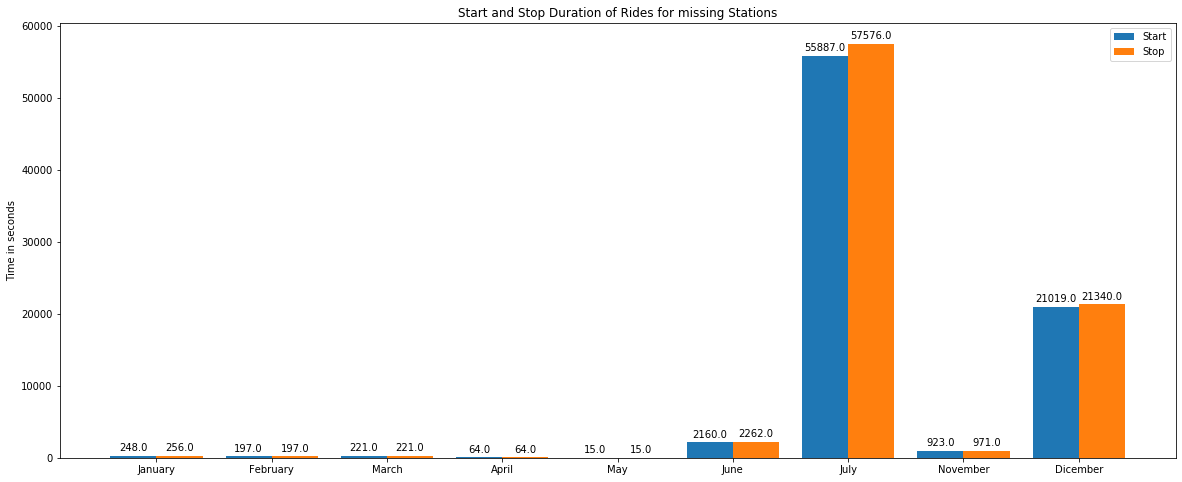

In [15]:
start = list((start_nostation.groupby(start_nostation['start_time'].dt.month).describe().duration_sec)['count'])
stop = list((end_nostation.groupby(end_nostation['end_time'].dt.month).describe().duration_sec)['count'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'November', 'Dicember']

x = np.arange(len(months))  # the label locations
width = 0.40  # the width of the bars


fig, ax = plt.subplots(figsize=(20,8))

rects1 = ax.bar(x - width/2, start, width, label='Start')
rects2 = ax.bar(x + width/2, stop, width, label='Stop')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in seconds')
ax.set_title('Start and Stop Duration of Rides for missing Stations')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

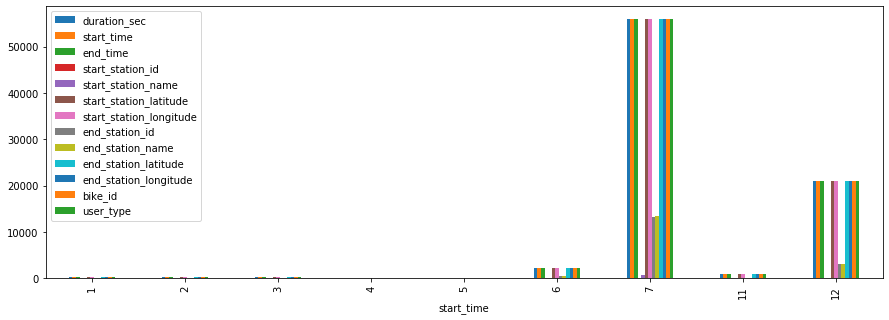

In [16]:
start_nostation.groupby(start_nostation['start_time'].dt.month).count().plot(kind = 'bar', figsize=(15, 5));

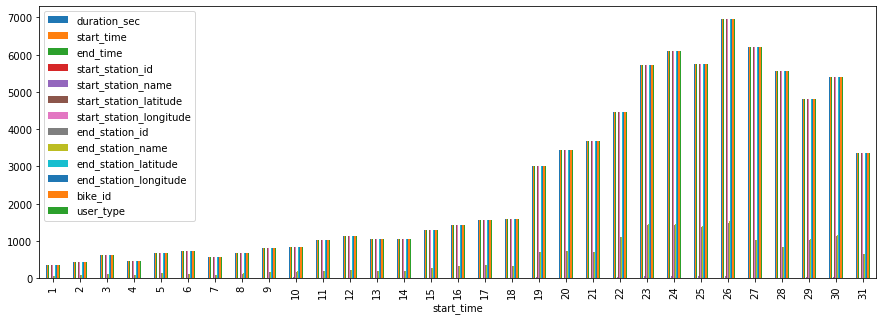

In [17]:
start_nostation.groupby(start_nostation['start_time'].dt.day).count().plot(kind = 'bar', figsize=(15, 5));

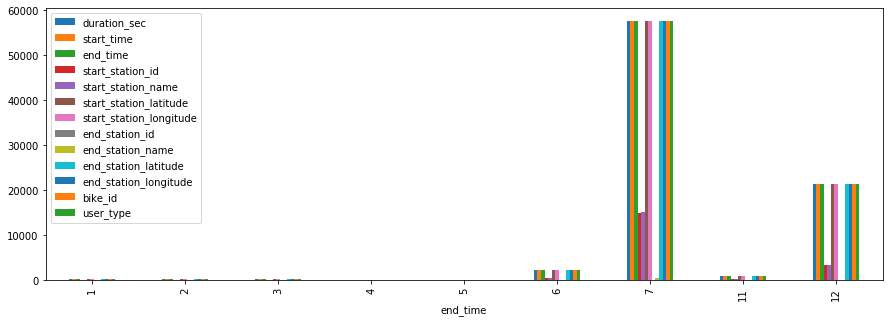

In [18]:
end_nostation.groupby(end_nostation['end_time'].dt.month).count().plot(kind = 'bar', figsize=(15, 5));

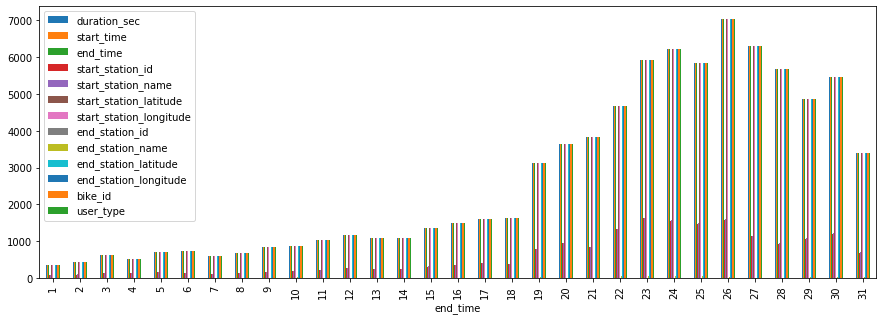

In [19]:
end_nostation.groupby(end_nostation['end_time'].dt.day).count().plot(kind = 'bar', figsize=(15, 5));

In [20]:
df.duplicated().sum()

0

In [21]:
df.bike_id.nunique()

11070

#### Conclusion while assessing the Dataset:
We found some quality issues related to missing values and wrong data types. There are otherwise no tidiness Issues and no duplicate Entries.

It looks like in June and September a lot of missing values occured. It looks like a technical problem might have occured. However such data can retrieved by geospatial information we happen to posess.

[Back To Top](#top)

<a id='clean'></a>
### Cleaning Data for the greater San Fransisco Bay Area:

- Quality Issue #1: Missing values for 'start_station_id' and 'end_station_id'
- Quality Issue #2: Missing values for 'start_station_name' and 'end_station_name'
- Data Types have been updated while reading .csv files using the types dictionary. We have later changed datetype that also helped us in the assessing part.  

#### Quality Issue #1: Missing values for 'start_station_id' and 'end_station_id'

#### Define:
- Datatype of 'start_station_id'and 'end_station_id' to a string has been already changed during reading the .csv file
- set the value 'None' instead of the 'NaT' value in the Columns 'start_station_id' and 'end_station_id'

#### Code:

In [22]:
# Write a function to set 'Not a station' instead of 'nan'
def format_station_id(x):
    if pd.isna(x):
        x = 'None'
    return x

In [23]:
# convert the type of the columns values to string objects and format the values as an ID or 'None'
df['start_station_id'] = df['start_station_id'].map(format_station_id)
df['end_station_id'] = df['end_station_id'].map(format_station_id)

print(df.start_station_id.dtype, df.end_station_id.dtype)

object object


#### Test:

In [24]:
#check start_station_id values
df.start_station_id.head()

0    229
1      4
2    245
3     85
4     16
Name: start_station_id, dtype: object

In [25]:
#check values start_station_id values that do not hold a value
start_nans = df.query('start_station_id == "None"')
start_nans.shape

(80734, 13)

In [26]:
#check values end_station_id values that do not hold a value
end_nans = df.query('end_station_id == "None"')
end_nans.shape

(82902, 13)

#### Quality Issue #2: Missing values for 'start_station_name' and 'end_station_name'

#### Define:
- set the value 'None' instead of 'NaN' values in the columns 'start_station_name' and 'end_station_name'

#### Code:

In [27]:
df['start_station_name'].fillna('None', inplace=True)
df['end_station_name'].fillna('None', inplace=True)

#### Test:

In [28]:
start_nans.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
2023,746,2019-01-31 18:21:27.002,2019-01-31 18:33:53.087,None,<NA>,37.40,-121.92,None,<NA>,37.41,-121.94,4244,Subscriber
2533,278,2019-01-31 18:00:28.204,2019-01-31 18:05:07.090,None,<NA>,37.40,-121.94,None,<NA>,37.40,-121.94,4249,Subscriber
3089,830,2019-01-31 17:23:59.341,2019-01-31 17:37:50.025,None,<NA>,37.39,-121.93,None,<NA>,37.40,-121.93,4208,Subscriber
5264,562,2019-01-31 13:29:18.525,2019-01-31 13:38:41.021,None,<NA>,37.40,-121.93,None,<NA>,37.39,-121.93,4208,Subscriber
5833,1676,2019-01-31 11:36:57.045,2019-01-31 12:04:53.501,None,<NA>,37.40,-121.94,None,<NA>,37.40,-121.94,4251,Customer


In [29]:
end_nans.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
2023,746,2019-01-31 18:21:27.002,2019-01-31 18:33:53.087,None,<NA>,37.40,-121.92,None,<NA>,37.41,-121.94,4244,Subscriber
2533,278,2019-01-31 18:00:28.204,2019-01-31 18:05:07.090,None,<NA>,37.40,-121.94,None,<NA>,37.40,-121.94,4249,Subscriber
3089,830,2019-01-31 17:23:59.341,2019-01-31 17:37:50.025,None,<NA>,37.39,-121.93,None,<NA>,37.40,-121.93,4208,Subscriber
5264,562,2019-01-31 13:29:18.525,2019-01-31 13:38:41.021,None,<NA>,37.40,-121.93,None,<NA>,37.39,-121.93,4208,Subscriber
5833,1676,2019-01-31 11:36:57.045,2019-01-31 12:04:53.501,None,<NA>,37.40,-121.94,None,<NA>,37.40,-121.94,4251,Customer


#### We will sort the Dataframe in an ascending, chronological Order, from January to December 2019

In [30]:
def reset_df(dataframe):
    '''Sort, Reset Index and create minutes feature for dataframe'''
    dataframe = dataframe.sort_values('start_time')
    dataframe.reset_index(drop=True, inplace=True) #reset index to create a GeoDataFrame
    dataframe['duration_min'] = dataframe['duration_sec']//60

In [31]:
reset_df(df)

### GeoSpatial Analysis for the greater San Fransisco Bay Area:
Disclaimer: Cleaning Missing Data based on their coordinates. Before, I said I wouldn't work with geospatial data. I lied!

Import necessary libraries

In [32]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
from shapely.geometry import Point, Polygon

Load San Francisco Basemap downloaded at this [link](https://geodata.lib.berkeley.edu/catalog/stanford-hp348jr8547)

In [33]:
#load shapefile
basemap = gpd.read_file('./san_francisco/hp348jr8547.shp')

Create station points geometry based on the starting point coordinates found in our master dataframe

In [34]:
#create geometry based on our lat and lon starting points
%timeit
station_points = [Point(xy) for xy in zip(df["start_station_longitude"], df["start_station_latitude"])] 

Specify [coordinate reference system](https://epsg.io/4326) and generate GeoDataFrame containing station_points geometry we have previously created.

In [35]:
crs = {'init': 'epsg: 4326'} #coordinate system WGS 84
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = station_points) #create a GeoDataFrame

Create a fast visualization function to display our GeoData

In [36]:
#create a function to visualize point geometries with the use of a backround shapefile polygon
def visualize_geometries(shapefile_path, geo_data):
    '''Visualize xy point geometries'''
    basemap = gpd.read_file(shapefile_path)
    fig, ax = plt.subplots(figsize = (15,15))
    basemap.plot(ax = ax, alpha = 0.4, color = 'grey')
    geo_data[geo_data['duration_sec'] > 0].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'sec')
    plt.legend(prop = {'size':15})

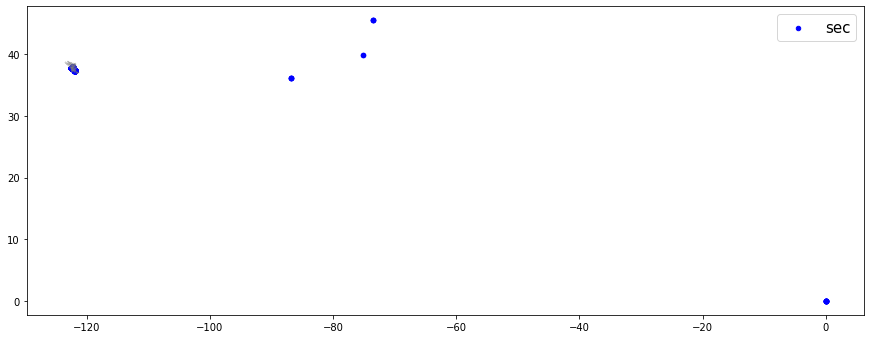

In [37]:
#Visualize our GeoDataFrame
%timeit
shapefile_path = './san_francisco/hp348jr8547.shp'
geo_data = geo_df
visualize_geometries(shapefile_path, geo_data)

In [38]:
#Inspect geometries out of our GeoDataFrame's boundaries
invalid_geo = geo_df.query('start_station_latitude < 30 | end_station_latitude < 30 | start_station_longitude > - 100 | end_station_longitude > - 100')
print(invalid_geo.shape[0])

103


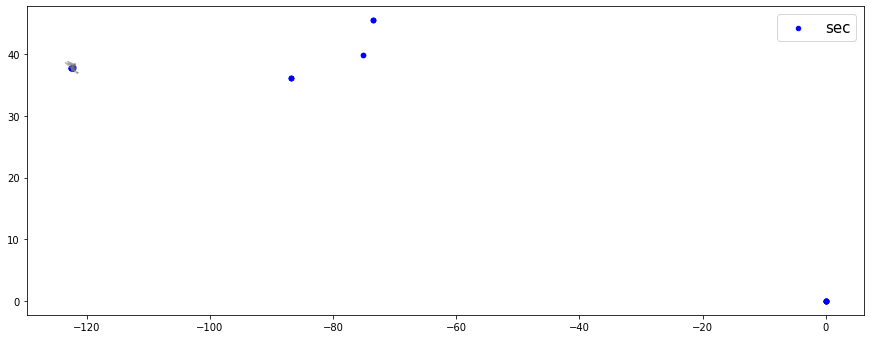

In [39]:
#Visualize invalid_geo
shapefile_path = './san_francisco/hp348jr8547.shp'
geo_data = invalid_geo
visualize_geometries(shapefile_path, geo_data)

In [40]:
#drop invalid_geo records
records_to_drop = geo_df.iloc[invalid_geo.index]
len(records_to_drop)

103

In [41]:
geo_df.drop(records_to_drop.index, axis = 0, inplace = True)

Create a sample GeoDataFrame for fast visualization

In [42]:
geo_df_s = geo_df.sample(20000) #work on a sample dataset for visualization reasons

Create a GeoDataFrame selecting the SE part of our geometries: Jan Jose 

In [43]:
san_jose_df = geo_df.query('start_station_latitude < 37.5 | end_station_latitude < 30.5' )
san_jose_df.shape[0]

138327

Create a GeoDataFrame selecting the NW part of our geometries: San Francisco

In [44]:
sf_df = geo_df.query('(start_station_latitude >  37.5 & start_station_longitude < -122.36) & ( end_station_latitude > 37.5 & end_station_longitude  < -122.36)')
sf_df.shape[0]

1852821

Create a GeoDataFrame selecting the NE part of our geometries: OakLand

In [45]:
oakland_df = geo_df.query('(start_station_latitude >  37.5 & start_station_longitude > -122.36) & ( end_station_latitude > 37.5 & end_station_longitude  > -122.36)')
oakland_df.shape[0]

515609

Unless have either invented flying bikes so far, or truing to find a way back ET the alien from San Francisco to the outer space, I suspect there is a high probability some bikes scaped illegally from San Francisco to go elsewhere. Here's a [link](sf.streetsblog.org/2018/10/24/plans-advance-for-bay-bridge-bikeped-path-to-san-francisco/) describing the actual situation for bike transition in the region. Let's inspect those.

In [46]:
illegal_sf_df = geo_df.query('(start_station_latitude >  37.5 & start_station_longitude < -122.36) & ( end_station_latitude < 37.5 | end_station_longitude  > -122.36)')
illegal_sf_df.shape[0]

45

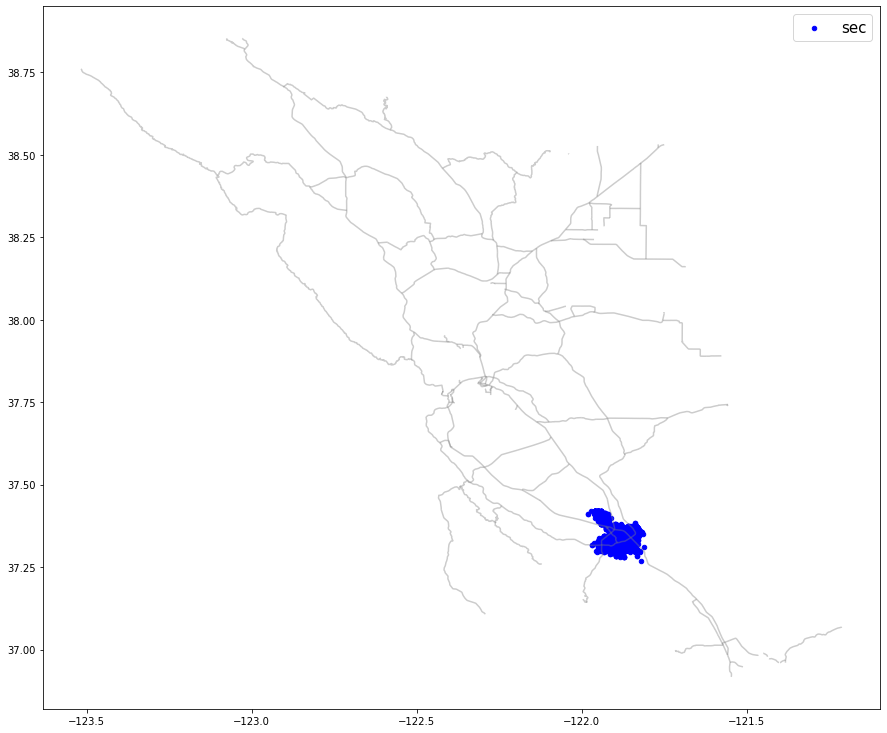

In [47]:
#Visualize san_jose_df
%timeit
shapefile_path = './san_francisco/hp348jr8547.shp'
geo_data = san_jose_df
visualize_geometries(shapefile_path, geo_data)

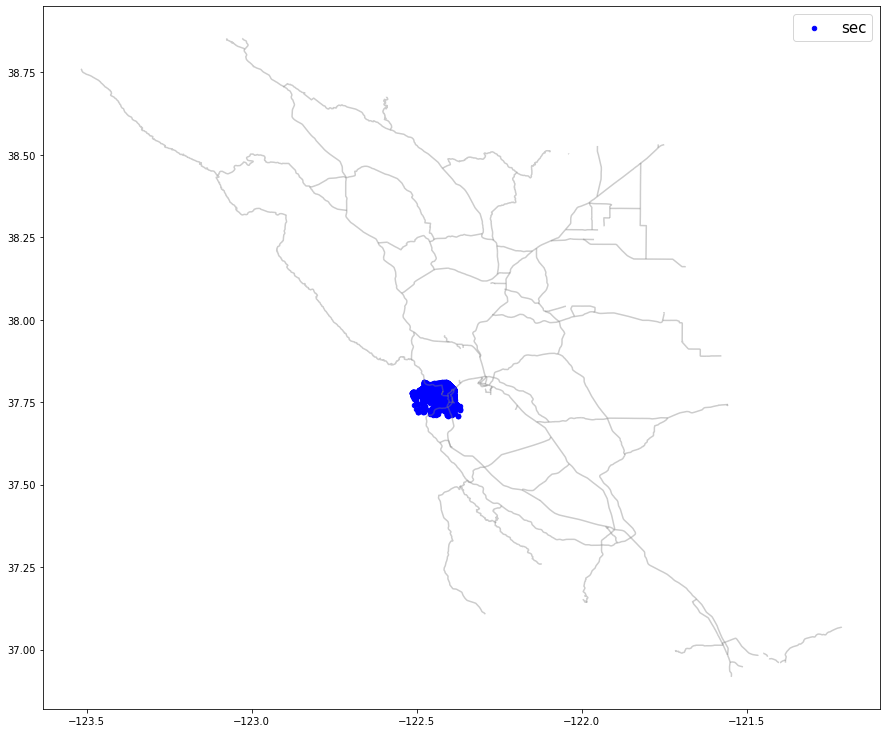

In [48]:
#Visualize sf_df
%timeit
shapefile_path = './san_francisco/hp348jr8547.shp'
geo_data = sf_df
visualize_geometries(shapefile_path, geo_data)

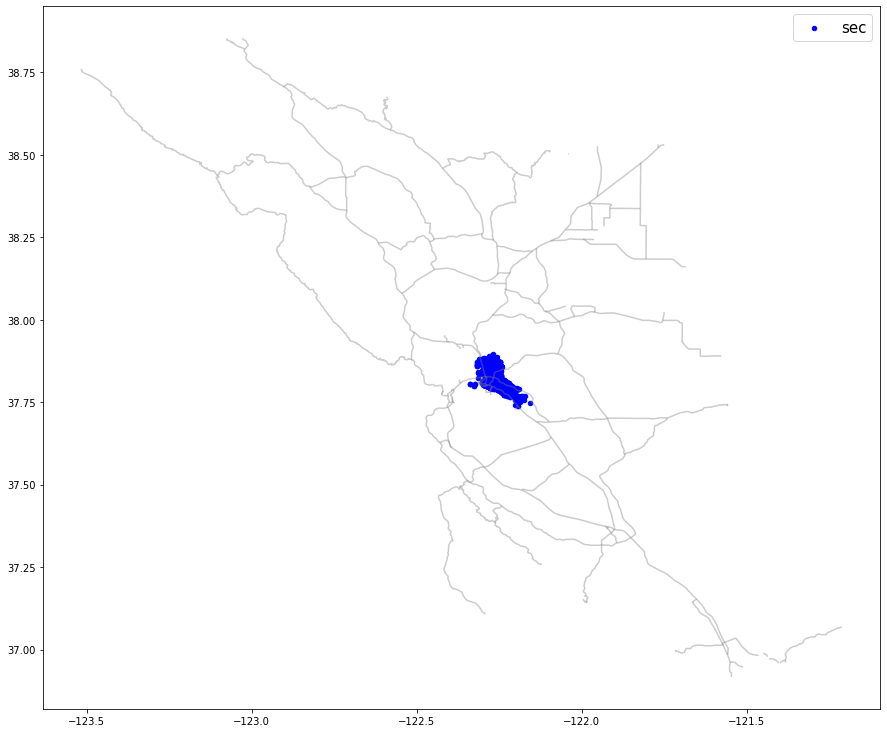

In [49]:
#Visualize oakland_df
%timeit
shapefile_path = './san_francisco/hp348jr8547.shp'
geo_data = oakland_df
visualize_geometries(shapefile_path, geo_data)

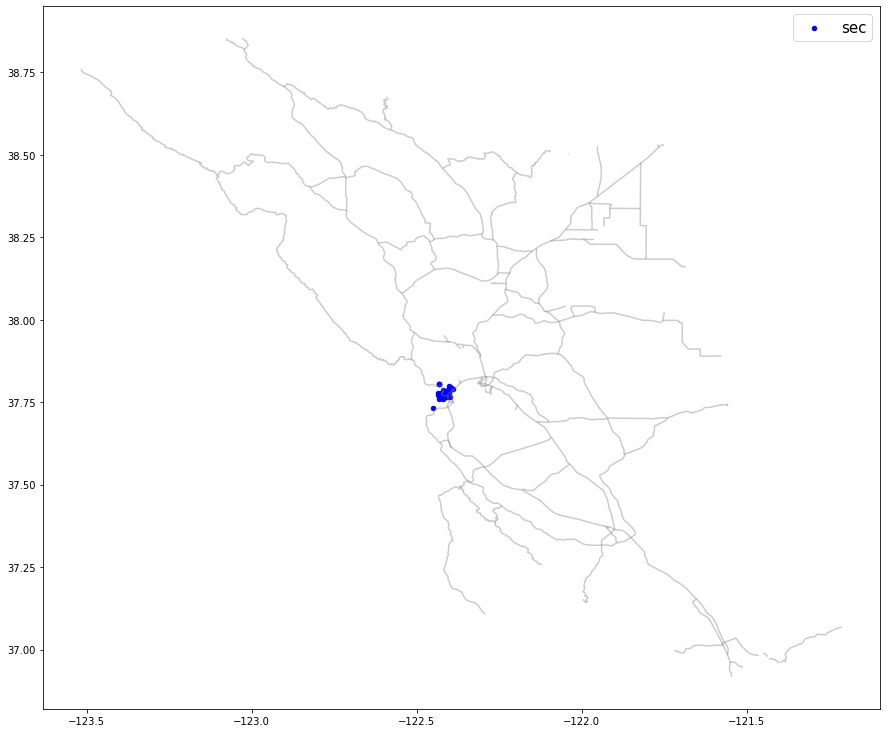

In [50]:
#Visualize illegal_sf_df
%timeit
shapefile_path = './san_francisco/hp348jr8547.shp'
geo_data = illegal_sf_df
visualize_geometries(shapefile_path, geo_data)

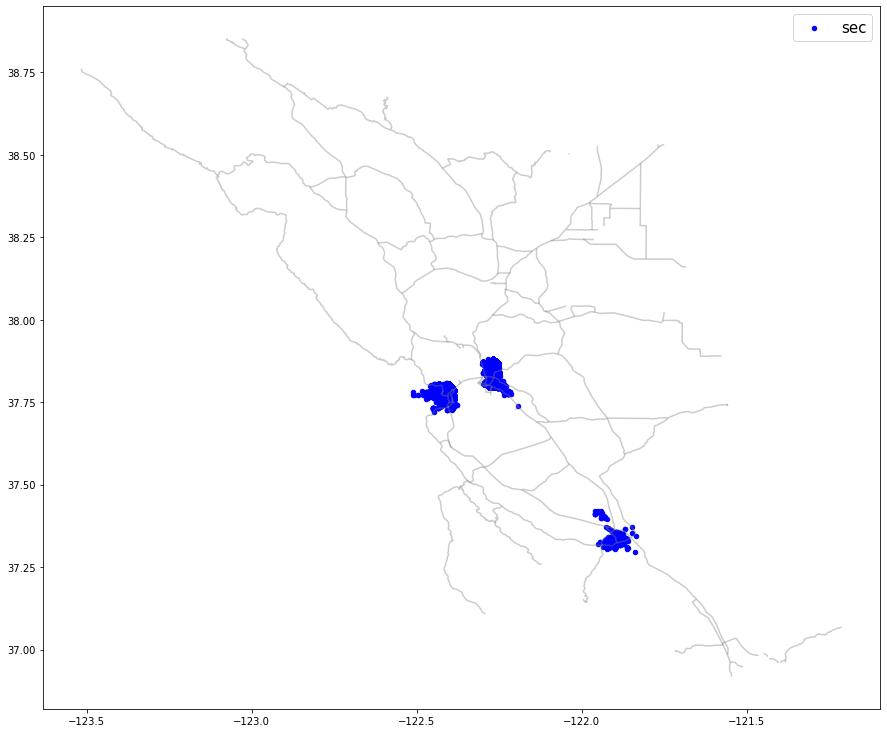

In [51]:
#Visualize geo_df_s a sample df coming fromthe original dataframe
%timeit
shapefile_path = './san_francisco/hp348jr8547.shp'
geo_data = geo_df_s
visualize_geometries(shapefile_path, geo_data)

In [52]:
import copy
def reset_df(dataframe):
    '''Sort and Reset Index'''
    dataframe = copy.deepcopy(dataframe)
    dataframe = dataframe.sort_values('start_time')
    dataframe.reset_index(drop=True, inplace=True) #reset index to create a GeoDataFrame
    return dataframe

In [53]:
for data_df in [geo_df_s, san_jose_df, sf_df, oakland_df, illegal_sf_df]:
    reset_df(data_df)


### Visualize some trees in San Francisco for fun

In [54]:
trees = gpd.read_file(gplt.datasets.get_path('san_francisco_street_trees_sample'))
sf = gpd.read_file(gplt.datasets.get_path('san_francisco'))


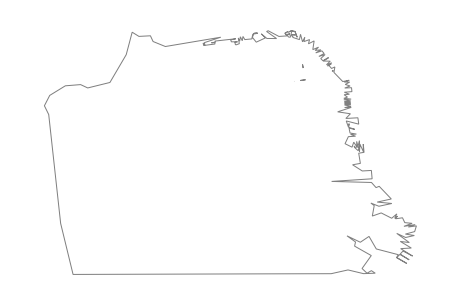

In [55]:
sf_map = gplt.polyplot(sf, facecolor='None', edgecolor='gray', linewidth=1, zorder=2)

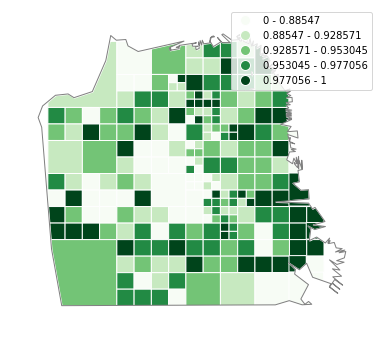

In [56]:
ax = gplt.quadtree(
    trees.assign(nullity=trees['Species'].notnull().astype(int)),
    projection=gcrs.AlbersEqualArea(),
    hue='nullity', nmax=1, cmap='Greens', scheme='Quantiles', legend=True,
    clip=sf, edgecolor='white', linewidth=1
)
gplt.polyplot(sf, facecolor='None', edgecolor='gray', linewidth=1, zorder=2, ax=ax)

#plt.savefig("san-francisco-street-trees.png", bbox_inches='tight', pad_inches=0)

[Back to Top](#top)

<a id='analyze'></a>
## Exploratory Data Analysis

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [57]:
san_jose_df['duration_min'] = san_jose_df['duration_sec']//60
sf_df['duration_min'] = sf_df['duration_sec']//60
oakland_df['duration_min'] = oakland_df['duration_sec']//60

<ipython-input-57-6c57c9dbf986>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_jose_df['duration_min'] = san_jose_df['duration_sec']//60
<ipython-input-57-6c57c9dbf986>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_df['duration_min'] = sf_df['duration_sec']//60
<ipython-input-57-6c57c9dbf986>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [114]:
df_rides = pd.read_csv('baywheel.csv')

In [115]:
#drop invalid_geo records
records_to_drop = geo_df.iloc[invalid_geo.index]
len(records_to_drop)

103

In [117]:
df_rides.drop(records_to_drop.index, axis = 0, inplace = True)

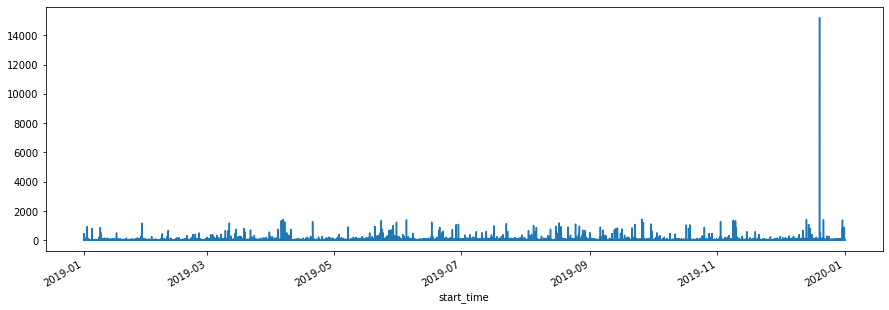

In [58]:
plt.figure(figsize = (15, 5))
san_jose_df.index = san_jose_df['start_time']
san_jose_df.duration_min.plot.line();

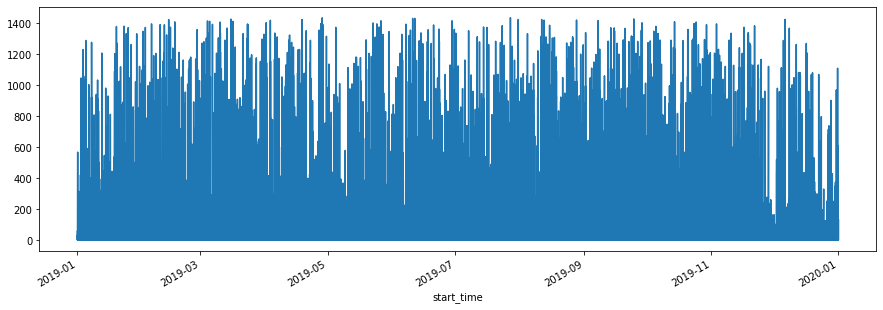

In [59]:
plt.figure(figsize = (15, 5))
sf_df.index = sf_df['start_time']
sf_df.duration_min.plot.line();

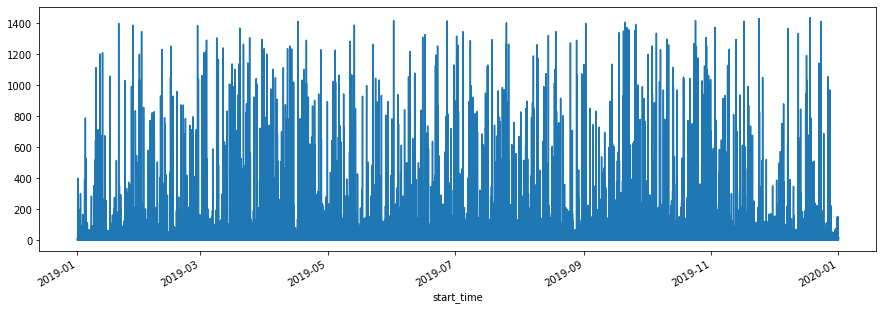

In [60]:
plt.figure(figsize = (15, 5))
oakland_df.index = oakland_df['start_time']
oakland_df.duration_min.plot.line();

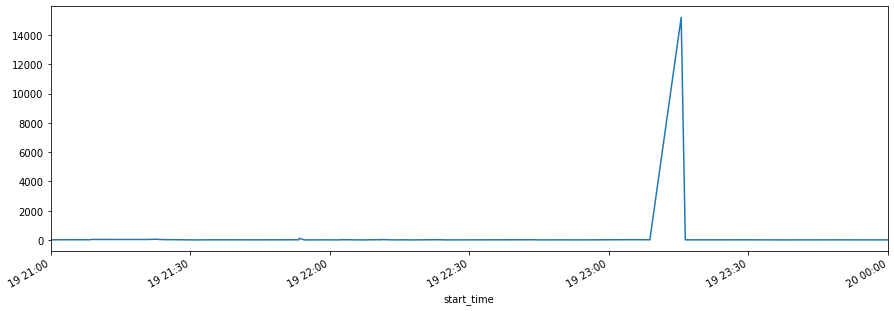

In [61]:
import datetime
dstart = datetime.datetime(2019,12,19,21,0,0)
dend = datetime.datetime(2019,12,20,0,0,0)
plt.figure(figsize = (15, 5))
san_jose_df.index = san_jose_df['start_time']
plt.xlim(dstart, dend)
san_jose_df.duration_min.plot.line();

A lot of noise in San Francisco, less in Oakland, quiet stuff in San Jose

In [62]:
# Make a working copy of the Dataframe to analyse
df_rides = df.copy()

In [63]:
df_rides.head()
print(df_rides.shape)

(2506983, 14)


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

#### Investigation on the Duration of the Rides

In [64]:
df_rides.duration_sec.describe()

count    2.506983e+06
mean     8.076483e+02
std      1.974714e+03
min      6.000000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

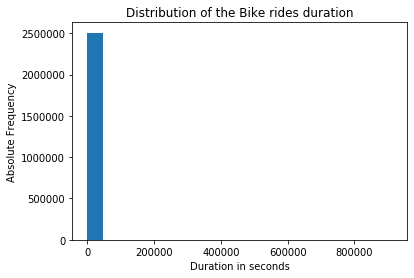

In [65]:
# plot a Histogram of the distribution
plt.hist(df_rides.duration_sec, bins= 20);
plt.xlabel('Duration in seconds');
plt.ylabel('Absolute Frequency');
plt.title('Distribution of the Bike rides duration');

#### First Observation from the Visualization:

The distribution is extremly right skewed, with outliers far right on the x-axis by more than $8e4$ seconds (more than circa 22 hours). Most of rides are below $5000$ seconds (which is less than 83 minutes). We are unable to visualize something more in the present plot. In order to better explore our distribution we have to modify x-axis to see more.
It would indeed make sense, to change the units of the duration, from seconds to minutes and deal with smaller numbers, given As the minimum duration of the rides is just above 1 minute.

In [66]:
# Create a new feature for the Duration unit to number of minutes (as an integer) 
df_rides['duration_min'] = df_rides['duration_sec']//60
df_rides.duration_min.describe()

count    2.506983e+06
mean     1.296946e+01
std      3.291311e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.520100e+04
Name: duration_min, dtype: float64

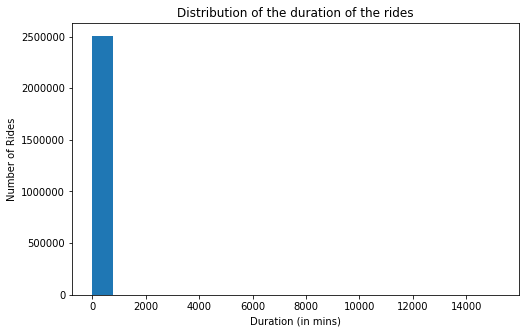

In [67]:
fig = plt.figure(figsize=[8,5])
plt.hist(df_rides.duration_min, bins=20);
plt.xlabel('Duration (in mins)');
plt.ylabel('Number of Rides');
plt.title("Distribution of the duration of the rides");

We do have smaller numbers after converting our values to minutes, to deal with smaller numbers, but it looks like keeping a linear scale for the x-axis, does not really improve the Plot Readability.

#### Explore rides below 10 minutes in the entire dataframe

In [68]:
total_number_of_rides = df_rides.shape[0]
df_minus_10 = df_rides[df_rides.duration_min <11]
df_minus_10

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,geometry,duration_min
9,323,2019-01-31 23:59:47.568,2019-02-01 00:05:11.177,223,16th St Mission BART Station 2,37.764765,-122.420091,129,Harrison St at 20th St,37.758862,-122.412544,1976,Subscriber,POINT (-122.42009 37.76477),5
11,433,2019-01-31 23:57:04.381,2019-02-01 00:04:17.489,266,Parker St at Fulton St,37.862464,-122.264791,256,Hearst Ave at Euclid Ave,37.875112,-122.260553,4642,Subscriber,POINT (-122.26479 37.86246),7
12,272,2019-01-31 23:59:44.880,2019-02-01 00:04:17.080,349,Howard St at Mary St,37.781010,-122.405666,60,8th St at Ringold St,37.774520,-122.409449,263,Subscriber,POINT (-122.40567 37.78101),4
13,547,2019-01-31 23:51:54.232,2019-02-01 00:01:01.505,77,11th St at Natoma St,37.773507,-122.416040,349,Howard St at Mary St,37.781010,-122.405666,3035,Subscriber,POINT (-122.41604 37.77351),9
15,559,2019-01-31 23:51:17.407,2019-02-01 00:00:36.748,41,Golden Gate Ave at Polk St,37.781270,-122.418740,52,McAllister St at Baker St,37.777416,-122.441838,5019,Subscriber,POINT (-122.41874 37.78127),9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506965,507,2019-12-24 16:32:01.000,2019-12-24 16:40:29.000,None,None,37.808573,-122.411777,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,226031,Subscriber,POINT (-122.41178 37.80857),8
2506967,132,2019-12-27 12:09:16.000,2019-12-27 12:11:28.000,None,None,37.808783,-122.409670,None,None,37.808722,-122.409691,396408,Customer,POINT (-122.40967 37.80878),2
2506969,266,2019-12-31 23:05:58.000,2019-12-31 23:10:24.000,None,None,37.809072,-122.409504,None,None,37.807346,-122.408989,787584,Subscriber,POINT (-122.40950 37.80907),4
2506970,233,2019-12-31 09:42:39.000,2019-12-31 09:46:32.000,None,None,37.809149,-122.415174,None,None,37.805395,-122.415017,499815,Customer,POINT (-122.41517 37.80915),3


In [69]:
minus_10_in_percent = df_minus_10.shape[0]/total_number_of_rides*100
print(minus_10_in_percent)

58.67219681984282


About <b>58.67%</b> of the ride's durations are less or equal than 10 minutes

#### Explore rides below 100 minutes in the entire dataframe

99.4262825076995


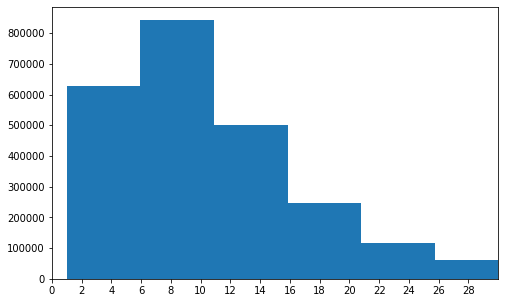

In [70]:
df_minus_100 = df_rides[df_rides.duration_min <101]
fig = plt.figure(figsize=[8,5])
plt.hist(df_minus_100.duration_min, bins=20);
plt.xlim(0, 30);
plt.xticks(np.arange(0,30, 2));

minus_100_in_percent = df_minus_100.shape[0]/total_number_of_rides*100
print(minus_100_in_percent)

About <b>99.4%</b> of the ride's durations are less or equal than 100 minutes

#### Explore rides over 200 minutes in the entire dataframe

In [71]:
df_over_200 = df_rides[df_rides.duration_min >=200]
df_over_200.shape

(5552, 15)

In [72]:
df_over_200.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,duration_min
count,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000
mean,31836.211095,37.770541,-122.361099,37.532329,-121.589660,530.114733
std,23522.321324,0.096871,0.116175,2.991279,9.686118,392.035821
min,12000.000000,37.306863,-122.479000,0.000000,-122.508199,200.000000
25%,15153.750000,37.771917,-122.417385,37.771431,-122.418892,252.000000
50%,22962.500000,37.783899,-122.402570,37.783899,-122.400876,382.000000
75%,45213.000000,37.798014,-122.388098,37.800214,-122.387921,753.250000
max,912110.000000,37.880222,-121.858797,37.880222,0.000000,15201.000000


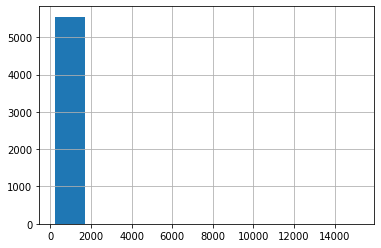

In [73]:
df_over_200.duration_min.hist();

#### Explore rides over 20 hours in the entire dataframe

In [74]:
df_over_20_hours = df_over_200[df_over_200.duration_min >= 1200]
df_over_20_hours.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,duration_min
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,80911.887955,37.765707,-122.348660,36.917676,-119.605440,1348.030812
std,44296.666210,0.106687,0.126765,5.598255,18.134387,738.262431
min,72001.000000,37.306863,-122.465007,0.000000,-122.458806,1200.000000
25%,75505.000000,37.769188,-122.417385,37.766349,-122.419622,1258.000000
50%,77937.000000,37.780955,-122.400876,37.776754,-122.398113,1298.000000
75%,82166.000000,37.800214,-122.279352,37.797320,-122.271756,1369.000000
max,912110.000000,37.875112,-121.876613,37.873676,0.000000,15201.000000


In [75]:
df_over_20_hours.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,geometry,duration_min
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,POINT (-122.21304 37.77575),1347
5666,72070,2019-01-30 16:29:31.068,2019-01-31 12:30:41.673,197,El Embarcadero at Grand Ave,37.808848,-122.249680,197,El Embarcadero at Grand Ave,37.808848,-122.249680,4476,Subscriber,POINT (-122.24968 37.80885),1201
17900,79934,2019-01-29 09:46:39.338,2019-01-30 07:58:53.925,61,Howard St at 8th St,37.776513,-122.411306,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5113,Subscriber,POINT (-122.41131 37.77651),1332
33625,83309,2019-01-27 13:42:30.363,2019-01-28 12:50:59.891,163,Lake Merritt BART Station,37.797320,-122.265320,197,El Embarcadero at Grand Ave,37.808848,-122.249680,958,Customer,POINT (-122.26532 37.79732),1388
33626,83302,2019-01-27 13:42:17.185,2019-01-28 12:50:39.973,163,Lake Merritt BART Station,37.797320,-122.265320,197,El Embarcadero at Grand Ave,37.808848,-122.249680,552,Customer,POINT (-122.26532 37.79732),1388
40173,75790,2019-01-26 18:08:56.992,2019-01-27 15:12:07.350,52,McAllister St at Baker St,37.777416,-122.441838,52,McAllister St at Baker St,37.777416,-122.441838,5122,Customer,POINT (-122.44184 37.77742),1263
47960,82362,2019-01-25 08:30:41.624,2019-01-26 07:23:23.662,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1035,Customer,POINT (-122.39420 37.79539),1372
56339,79982,2019-01-24 09:48:39.654,2019-01-25 08:01:41.872,16,Steuart St at Market St,37.794130,-122.394430,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1101,Customer,POINT (-122.39443 37.79413),1333
65393,82866,2019-01-23 09:08:28.679,2019-01-24 08:09:35.482,123,Folsom St at 19th St,37.760594,-122.414817,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1523,Customer,POINT (-122.41482 37.76059),1381
85410,84002,2019-01-20 18:33:15.278,2019-01-21 17:53:17.645,175,49th St at Telegraph Ave,37.835946,-122.262366,234,Farnam St at Fruitvale Ave,37.778058,-122.225400,4490,Customer,POINT (-122.26237 37.83595),1400


In [76]:
df_rides.duration_min.describe()

count    2.506983e+06
mean     1.296946e+01
std      3.291311e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.520100e+04
Name: duration_min, dtype: float64

#### Logarythmic scale representation for the x-axis

In [77]:
range_log = np.arange(np.log10(1), np.log10(1439)+0.1, 0.1)
range_log

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2])

In [78]:
log_x = 10**range_log
log_x

array([1.00000000e+00, 1.25892541e+00, 1.58489319e+00, 1.99526231e+00,
       2.51188643e+00, 3.16227766e+00, 3.98107171e+00, 5.01187234e+00,
       6.30957344e+00, 7.94328235e+00, 1.00000000e+01, 1.25892541e+01,
       1.58489319e+01, 1.99526231e+01, 2.51188643e+01, 3.16227766e+01,
       3.98107171e+01, 5.01187234e+01, 6.30957344e+01, 7.94328235e+01,
       1.00000000e+02, 1.25892541e+02, 1.58489319e+02, 1.99526231e+02,
       2.51188643e+02, 3.16227766e+02, 3.98107171e+02, 5.01187234e+02,
       6.30957344e+02, 7.94328235e+02, 1.00000000e+03, 1.25892541e+03,
       1.58489319e+03])

In [79]:
log_range= np.log10(df_rides.duration_min.max())-np.log10(df_rides.duration_min.min())
print(log_range, log_range/10)

4.181872159010333 0.4181872159010333


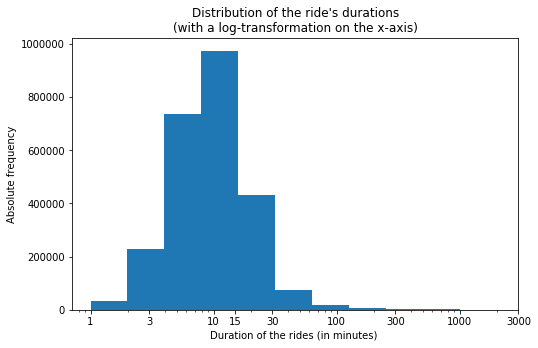

In [80]:
fig = plt.figure(figsize=[8,5])
bin_edges = 10 ** np.arange(0, 3.2+.03, 0.3)
plt.hist(df_rides['duration_min'], bins= bin_edges)
plt.xscale('log')
x_ticks = [1, 3, 10, 15, 30, 100, 300, 1e3, 3e3]
str_xticks = ['{:.0f}'.format(v) for v in x_ticks]
plt.xticks(x_ticks, str_xticks);
plt.xlabel('Duration of the rides (in minutes) ')
plt.ylabel('Absolute frequency');
plt.title('Distribution of the ride\'s durations\n(with a log-transformation on the x-axis)');

#### Use smaller bins, to plot a finer Distribution

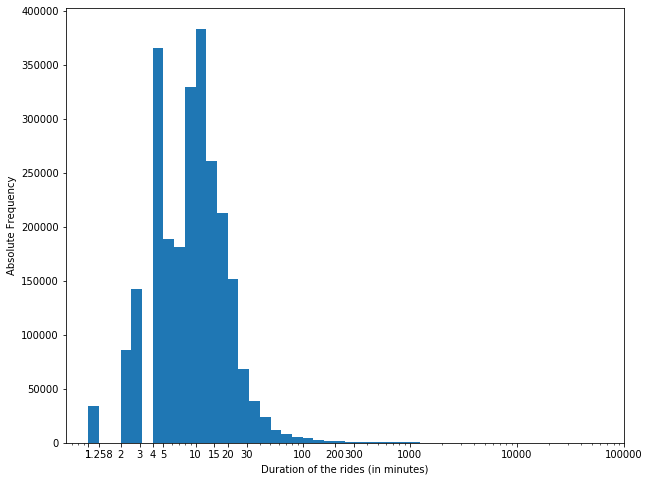

In [81]:
fig = plt.figure(figsize=[10,8])
bin_edges = 10 ** np.arange(np.log10(df_rides.duration_min.min()), \
                            np.log10(df_rides.duration_min.max())+0.1,0.1)
plt.hist(df_rides.duration_min, bins=bin_edges);
plt.xscale('log');
ticks=[1, 1.258, 2, 3, 4, 5, 10, 15, 20, 30, 100, 200, 300, 1000, 10000, 100000]
labels=['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);
plt.xlabel('Duration of the rides (in minutes)');
plt.ylabel('Absolute Frequency');

In [82]:
bin_edges

array([1.00000000e+00, 1.25892541e+00, 1.58489319e+00, 1.99526231e+00,
       2.51188643e+00, 3.16227766e+00, 3.98107171e+00, 5.01187234e+00,
       6.30957344e+00, 7.94328235e+00, 1.00000000e+01, 1.25892541e+01,
       1.58489319e+01, 1.99526231e+01, 2.51188643e+01, 3.16227766e+01,
       3.98107171e+01, 5.01187234e+01, 6.30957344e+01, 7.94328235e+01,
       1.00000000e+02, 1.25892541e+02, 1.58489319e+02, 1.99526231e+02,
       2.51188643e+02, 3.16227766e+02, 3.98107171e+02, 5.01187234e+02,
       6.30957344e+02, 7.94328235e+02, 1.00000000e+03, 1.25892541e+03,
       1.58489319e+03, 1.99526231e+03, 2.51188643e+03, 3.16227766e+03,
       3.98107171e+03, 5.01187234e+03, 6.30957344e+03, 7.94328235e+03,
       1.00000000e+04, 1.25892541e+04, 1.58489319e+04])

In [83]:
# I want to investigate the "holes" in the distribution.
df_hole = df_rides.query('duration_min>1.258 & duration_min <2')
df_hole.shape

(0, 15)

In [84]:
df_hole2 = df_rides.query('duration_min >3.162 & duration_min <4')
df_hole2.shape

(0, 15)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I have an extremely right skewed distribution for which I changed the x-axis scale several times after exploring the duration of the ride. I ended up creating a logarithmic x axis in order to represent my distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> An extremely right skewed distribution like the one we had makes it difficult to perform any kind of assumtions or understand how our data can provide reasonable decision making for our company. It looks like our extreme informatin is lined to illegal behaviour of our user and in some cases we have had tangible economic loss. A ride that lasts more than 20 hours is probably lined to a bike loss as we have explored in our GeoData analysis. We need to know the extend of that. It looks like it is of marginal importance in terms of bike loss. However we need to keep track of what is going on. The Distribution looks approximatively "log-normal". A big Peak is located between 4 and 5 minutes of Rental Duration and the biggest Common Rental Duration is between 8 and 15 minutes. 

#### Investigating values for user type

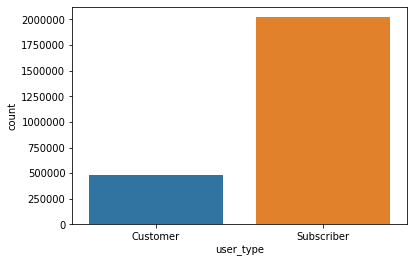

In [85]:
#checking the values for usertype
sns.countplot(data = df_rides, x='user_type');

#### Investigating the number of Rides in relation to the Date and Time the bikes were rented.
Investigate month, day of the week and time of the day, from the start_time and end_time

In [141]:
df_time = pd.DataFrame()
df_time[['start_time', 'end_time', 'user_type', 'duration_min']] = df_rides[['start_time', 'end_time', 'user_type', 'duration_min']]
#Deriving hour, month, year from start_time
df_time['start_year'] = df_rides.start_time.dt.year
df_time['start_month'] = df_rides.start_time.dt.month
df_time['start_hour'] = df_rides.start_time.dt.hour

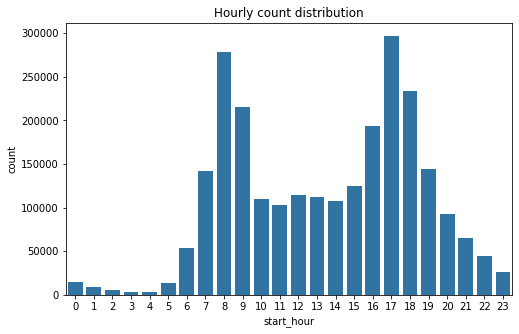

In [88]:
#Exploring start hour variable
base_color= sns.color_palette()[0]
plt.figure(figsize=(8,5))
sns.countplot(data = df_time, x = 'start_hour', color=base_color)
plt.title('Hourly count distribution');

In [89]:
weird= df_time.loc[df_time.start_time > df_time.end_time]
weird

,start_time,end_time,user_type,start_year,start_month,start_hour
2342111,2019-11-03 01:59:09.303,2019-11-03 01:27:49.671,Customer,2019,11,1
2342126,2019-11-03 01:59:37.722,2019-11-03 01:18:19.034,Customer,2019,11,1
2342134,2019-11-03 01:59:13.155,2019-11-03 01:09:56.715,Customer,2019,11,1
2342136,2019-11-03 01:50:02.261,2019-11-03 01:05:57.713,Customer,2019,11,1
2342137,2019-11-03 01:49:43.895,2019-11-03 01:05:50.979,Customer,2019,11,1
2342139,2019-11-03 01:56:25.083,2019-11-03 01:04:54.536,Customer,2019,11,1
2342140,2019-11-03 01:53:38.578,2019-11-03 01:04:08.087,Subscriber,2019,11,1
2342141,2019-11-03 01:53:14.617,2019-11-03 01:03:18.677,Customer,2019,11,1
2342142,2019-11-03 01:52:25.884,2019-11-03 01:03:17.964,Subscriber,2019,11,1
2342143,2019-11-03 01:55:36.152,2019-11-03 01:02:30.447,Subscriber,2019,11,1


In [90]:
weird.start_time.value_counts().sum()

11

In [91]:
weird.index

Int64Index([2342111, 2342126, 2342134, 2342136, 2342137, 2342139, 2342140,
            2342141, 2342142, 2342143, 2342144],
           dtype='int64')

In [92]:
df_4thnov= df_time.loc[df_time.start_time.dt.date == pd.to_datetime('2019-11-04')]

In [93]:
df_4thnov.shape

(8411, 6)

In [94]:
df_rides.loc[weird.index]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,geometry,duration_min
2342111,1720,2019-11-03 01:59:09.303,2019-11-03 01:27:49.671,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,356,Valencia St at Clinton Park,37.769188,-122.422285,12293,Customer,POINT (-122.40088 37.78487),28
2342126,1121,2019-11-03 01:59:37.722,2019-11-03 01:18:19.034,294,Pierce Ave at Market St,37.327581,-121.884559,300,Palm St at Willow St,37.317298,-121.884995,10968,Customer,POINT (-121.88456 37.32758),18
2342134,643,2019-11-03 01:59:13.155,2019-11-03 01:09:56.715,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,130,22nd St Caltrain Station,37.757704,-122.391885,9973,Customer,POINT (-122.41190 37.75102),10
2342136,955,2019-11-03 01:50:02.261,2019-11-03 01:05:57.713,98,Valencia St at 16th St,37.765052,-122.421866,321,Folsom St at 5th St,37.780645,-122.402866,10449,Customer,POINT (-122.42187 37.76505),15
2342137,967,2019-11-03 01:49:43.895,2019-11-03 01:05:50.979,98,Valencia St at 16th St,37.765052,-122.421866,321,Folsom St at 5th St,37.780645,-122.402866,798,Customer,POINT (-122.42187 37.76505),16
2342139,509,2019-11-03 01:56:25.083,2019-11-03 01:04:54.536,60,8th St at Ringold St,37.774520,-122.409449,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,2359,Customer,POINT (-122.40945 37.77452),8
2342140,629,2019-11-03 01:53:38.578,2019-11-03 01:04:08.087,33,Golden Gate Ave at Hyde St,37.781650,-122.415408,349,Howard St at Mary St,37.781010,-122.405666,11536,Subscriber,POINT (-122.41541 37.78165),10
2342141,604,2019-11-03 01:53:14.617,2019-11-03 01:03:18.677,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,95,Sanchez St at 15th St,37.766219,-122.431060,737,Customer,POINT (-122.41593 37.77877),10
2342142,652,2019-11-03 01:52:25.884,2019-11-03 01:03:17.964,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,95,Sanchez St at 15th St,37.766219,-122.431060,10832,Subscriber,POINT (-122.41593 37.77877),10
2342143,414,2019-11-03 01:55:36.152,2019-11-03 01:02:30.447,109,17th St at Valencia St,37.763316,-122.421904,125,20th St at Bryant St,37.759200,-122.409851,2401,Subscriber,POINT (-122.42190 37.76332),6


In [95]:
df_rides.loc[1515497:1515506]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,geometry,duration_min
1515497,892,2019-08-29 18:16:19.626,2019-08-29 18:31:12.071,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,10453,Subscriber,POINT (-122.39120 37.77041),14
1515498,492,2019-08-29 18:22:56.653,2019-08-29 18:31:09.530,26,1st St at Folsom St,37.787290,-122.394380,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2299,Subscriber,POINT (-122.39438 37.78729),8
1515499,687,2019-08-29 18:19:32.369,2019-08-29 18:30:59.431,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,9686,Customer,POINT (-122.39120 37.77041),11
1515500,3684,2019-08-29 17:29:26.197,2019-08-29 18:30:50.915,243,Bancroft Way at College Ave,37.869360,-122.254337,252,Channing Way at Shattuck Ave,37.865847,-122.267443,3230,Subscriber,POINT (-122.25434 37.86936),61
1515501,1523,2019-08-29 18:05:18.338,2019-08-29 18:30:42.103,58,Market St at 10th St,37.776619,-122.417385,400,Buchanan St at North Point St,37.804272,-122.433537,508,Customer,POINT (-122.41739 37.77662),25
1515502,713,2019-08-29 18:18:46.771,2019-08-29 18:30:40.004,81,Berry St at 4th St,37.775880,-122.393170,77,11th St at Natoma St,37.773507,-122.416040,1047,Subscriber,POINT (-122.39317 37.77588),11
1515503,210,2019-08-29 18:27:03.762,2019-08-29 18:30:33.960,178,Broadway at 30th St,37.819381,-122.261928,212,Mosswood Park,37.824893,-122.260437,2165,Subscriber,POINT (-122.26193 37.81938),3
1515504,298,2019-08-29 18:25:32.385,2019-08-29 18:30:31.298,87,Folsom St at 13th St,37.769757,-122.415674,123,Folsom St at 19th St,37.760594,-122.414817,9569,Subscriber,POINT (-122.41567 37.76976),4
1515505,144,2019-08-29 18:28:06.216,2019-08-29 18:30:30.410,180,Telegraph Ave at 23rd St,37.812678,-122.268773,182,19th Street BART Station,37.809013,-122.268247,985,Subscriber,POINT (-122.26877 37.81268),2
1515506,610,2019-08-29 18:20:13.994,2019-08-29 18:30:24.710,74,Laguna St at Hayes St,37.776435,-122.426244,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2300,Subscriber,POINT (-122.42624 37.77643),10


The Singularity we found here corresponds to the Time Change between PDT and PST!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

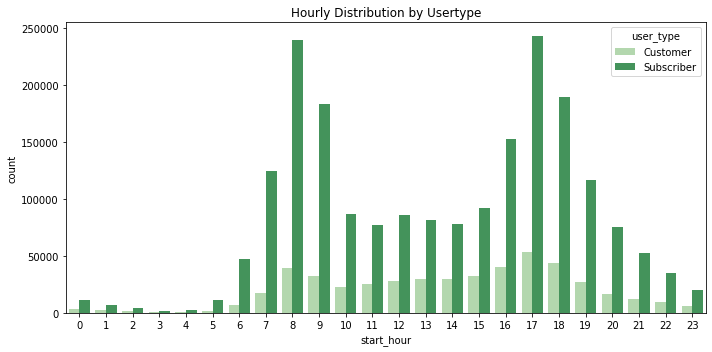

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_time, x = 'start_hour', hue = 'user_type', palette = 'Greens')
plt.title('Hourly Distribution by Usertype')
plt.tight_layout();

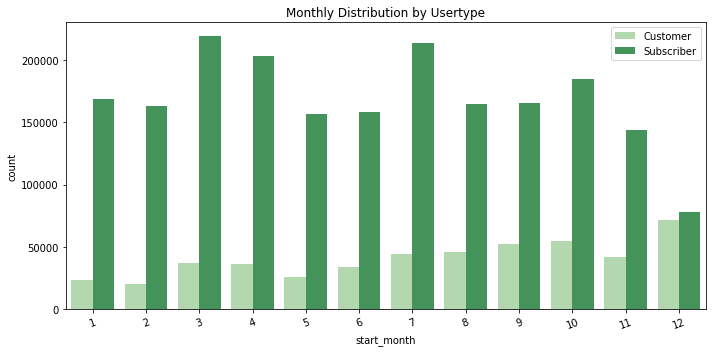

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_time, x = 'start_month', hue = 'user_type', palette = 'Greens')
plt.title('Monthly Distribution by Usertype')
plt.legend()
plt.xticks(rotation = 20)
plt.tight_layout();

In [142]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   start_time    datetime64[ns]
 1   end_time      datetime64[ns]
 2   user_type     category      
 3   duration_min  int32         
 4   start_year    int64         
 5   start_month   int64         
 6   start_hour    int64         
dtypes: category(1), datetime64[ns](2), int32(1), int64(3)
memory usage: 107.6 MB


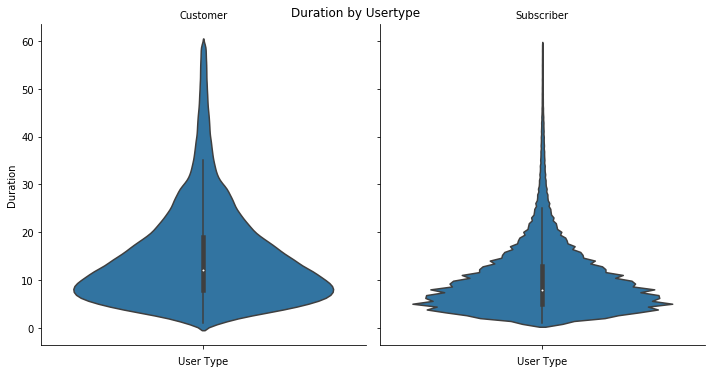

In [146]:
dur_1_hr = df_time[df_time.duration_min < 60]
g = sns.catplot(data = dur_1_hr, y = 'duration_min', col = "user_type", kind = 'violin')
g.fig.suptitle('Duration by Usertype')
g.set_titles(col_template = '{col_name}')
g.set_axis_labels('User Type', 'Duration');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscriber User Type is much more frequent to the Customer User Type which is also a great method for us to keep track of our business and support the safety of the city as a whole. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most popular hours to travel in bike using baywheels is from 7.00 am to 9.00 am and from 16.00 pm to 19.00 pm. Most opular months are March and July.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [147]:
df_time.head()

,start_time,end_time,user_type,duration_min,start_year,start_month,start_hour
0,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Subscriber,1347,2019,1,17
1,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,Subscriber,1098,2019,1,20
2,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,Customer,1043,2019,1,18
3,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,Customer,744,2019,1,19
4,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,Customer,1011,2019,1,14


In [179]:
df_time_s = df_time.sample(2000)

In [264]:
pivot_sum = df_time_s.pivot_table(index = 'user_type', columns = 'start_month', values = 'duration_min', aggfunc = np.sum, fill_value = 0)
pivot_sum = pivot_sum.rename(columns = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October',11:'November', 12:'Dicember'})
pivot_sum

start_month,January,February,March,April,May,June,July,August,September,October,November,Dicember
user_type,,,,,,,,,,,,
Customer,395,371,890,582,351,608,717,2051,569,671,647,834
Subscriber,1341,1160,1896,1443,1337,1250,2664,1241,1231,1711,1281,489


In [265]:
pivot_mean = df_time_s.pivot_table(index = 'user_type', columns = 'start_month', values = 'duration_min', aggfunc = np.mean, fill_value = 0)
pivot_mean = round(pivot_mean, 2)
pivot_mean = pivot_mean.rename(columns = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October',11:'November', 12:'Dicember'})
pivot_mean

start_month,January,February,March,April,May,June,July,August,September,October,November,Dicember
user_type,,,,,,,,,,,,
Customer,18.81,24.73,22.82,20.79,16.71,22.52,22.41,42.73,14.59,17.21,18.49,18.53
Subscriber,10.16,8.35,9.82,9.37,10.87,10.68,16.05,10.01,9.05,11.41,10.09,9.78


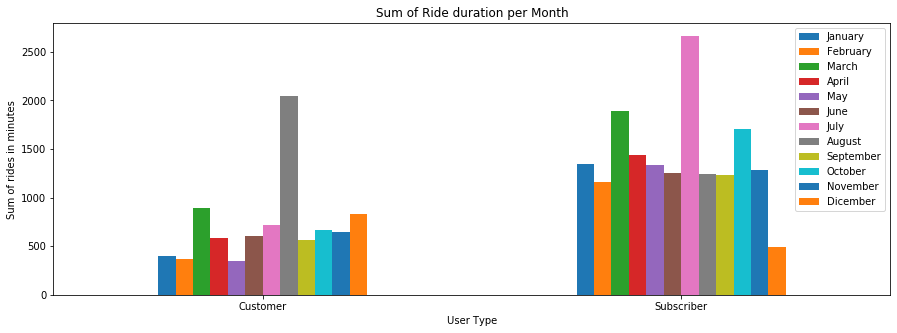

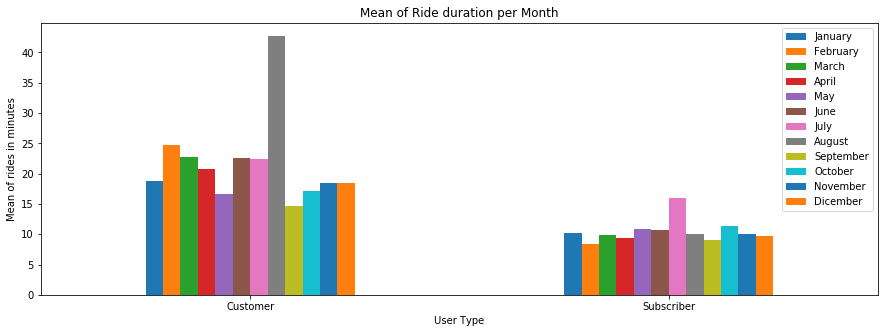

In [267]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Dicember']

pivot_sum.plot(kind = 'bar', figsize = (15, 5), title = "Sum of Ride duration per Month", rot = 0)
plt.legend(months)
plt.ylabel('Sum of rides in minutes')
plt.xlabel('User Type')
pivot_mean.plot(kind = 'bar', figsize=(15, 5), title = "Mean of Ride duration per Month", rot = 0)
plt.legend(months)
plt.xlabel('User Type')
plt.ylabel('Mean of rides in minutes');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>It looks like the In August Customers enjoy longer rides while subscribers in July.
### Were there any interesting or surprising interactions between features?

> It is confirmed that in August more non subscribed visitors make use of the bikes. These are probably tourists.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!